In [0]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.2.0


Pertama kita siapkan data dengan mengunduhnya dari alamat link yang telah disediakan menggunakan kode dibawah

In [6]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-06-08 07:41:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.64MB/s    in 44s     

2020-06-08 07:42:04 (7.03 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Setelah data tersedia, maka selanjutnya akan diekstraksi dan disimpan pada '/tmp/'

In [0]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

sebelumnya kita cek bentuk dari dari file rickpaperscissor.zip

In [8]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [9]:
!tree -d /tmp

/tmp
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── scissors

17 directories


selanjutnya kita install library split_folder tqdm

In [10]:
!pip install split_folders tqdm

setelah berhasil, kita split folder untuk kemudian dibuat masing-masing direktori untuk setiap jenis gambarnya dan cek jumlahnya. Direktori yang dipakai yaitu rps-cv-images

In [11]:
import os
import shutil
import split_folders

base_dir = '/tmp/rockpaperscissors/rps-cv-images/' #direktori utama
if ('data_model' in os.listdir(base_dir)):
  shutil.rmtree(os.path.join(base_dir, 'data_model'))

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images/',
                    output ='/tmp/rockpaperscissors/rps-cv-images/data_model',
                    seed=None, ratio=(.8,.2))

print('\n')
# BLOK ROCK
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock') #jumlah gambar rock
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/rock') #jumlah gambar train rock
val_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/rock') #jumlah gambar validation rock

# BLOK PAPER
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/paper')
val_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/paper')

# BLOK SCISSORS
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/scissors')
val_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/scissors')


print('\nJumlah Gambar Rock:', len(os.listdir(rock_dir)))
print('Pelatihan:', len(os.listdir(train_rock_dir)))
print('Validasi:', len(os.listdir(val_rock_dir)))

print('\n')

print('Jumlah Gambar Paper:', len(os.listdir(paper_dir)))
print('Pelatihan:', len(os.listdir(train_paper_dir)))
print('Validasi:', len(os.listdir(val_paper_dir)))

print('\n')
print('Jumlah Gambar Scissors:', len(os.listdir(scissors_dir)))
print('Pelatihan:', len(os.listdir(train_scissors_dir)))
print('Validasi:', len(os.listdir(val_scissors_dir)))

print('\n---------------------------')
print('Total Gambar:', len(os.listdir(rock_dir))+len(os.listdir(paper_dir))+ len(os.listdir(scissors_dir)))

Copying files: 2188 files [00:00, 2799.14 files/s]




Jumlah Gambar Rock: 726
Pelatihan: 580
Validasi: 146


Jumlah Gambar Paper: 712
Pelatihan: 569
Validasi: 143


Jumlah Gambar Scissors: 750
Pelatihan: 600
Validasi: 150

---------------------------
Total Gambar: 2188


selanjutnya kita lihat bentuk data hasil split folder sebelumnya

In [12]:
!tree -d /tmp/rockpaperscissors/rps-cv-images/data_model

/tmp/rockpaperscissors/rps-cv-images/data_model
├── train
│   ├── paper
│   ├── rock
│   └── scissors
└── val
    ├── paper
    ├── rock
    └── scissors

8 directories


maka kita bisa lihat beberapa gambar yang ada dengan kode dibawah

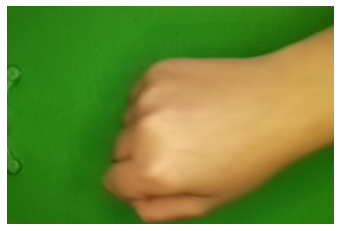

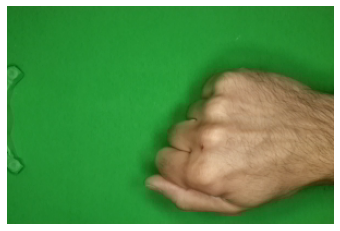

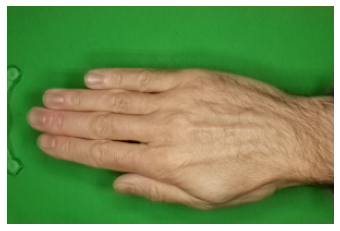

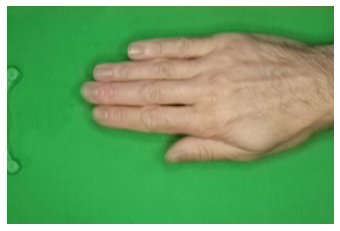

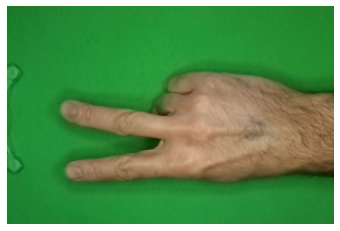

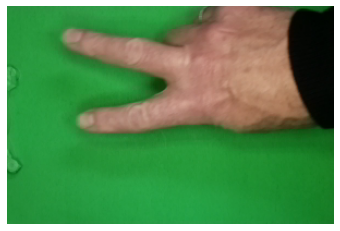

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator untuk data training dan data validation.
Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset dengan cara "horizontal flip" untuk melihat akurasi model pelatihan dan validasi.

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=28, steps_per_epoch=14,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps=3)

model.save("rockpaperscissors.h5")

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

Agar lebih mudah ditinjau maka hasil yang diperoleh harus kita visualisasikan

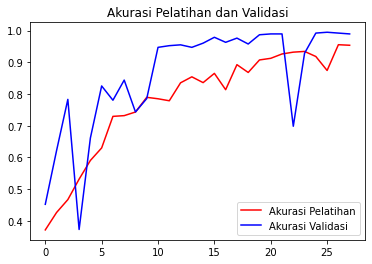

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Pelatihan')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.legend(loc=0)
plt.figure()


plt.show()

Terakhir kita Uji model yang telah kita buat

Saving 3bkC6JAPog7xX9WO.png to 3bkC6JAPog7xX9WO.png
3bkC6JAPog7xX9WO.png
[[0. 0. 1.]]


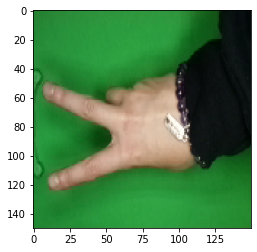

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #urutan CLass nya yaitu [Paper, Rock, Scissors]
  print(fn)
  print(classes)